In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

In [2]:
raw_data=pd.read_csv("IRIS.csv")

In [3]:
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
raw_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
raw_data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


 ### Dataset has no missing value and the data is properly distributed and cleaned

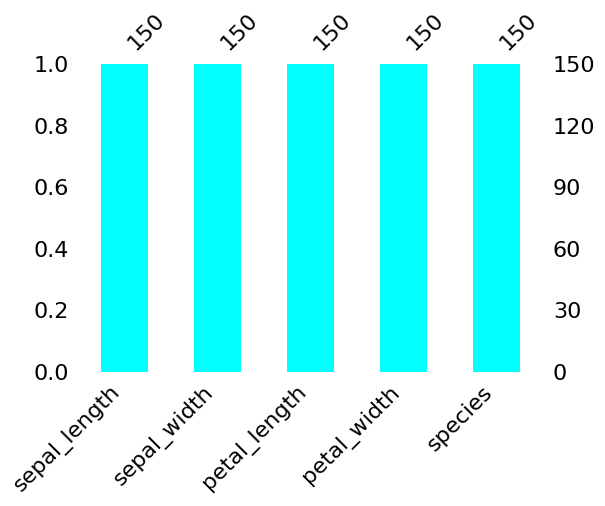

In [8]:
import missingno as mno
mno.bar(raw_data,figsize=(6,4),color="Cyan")
plt.show()

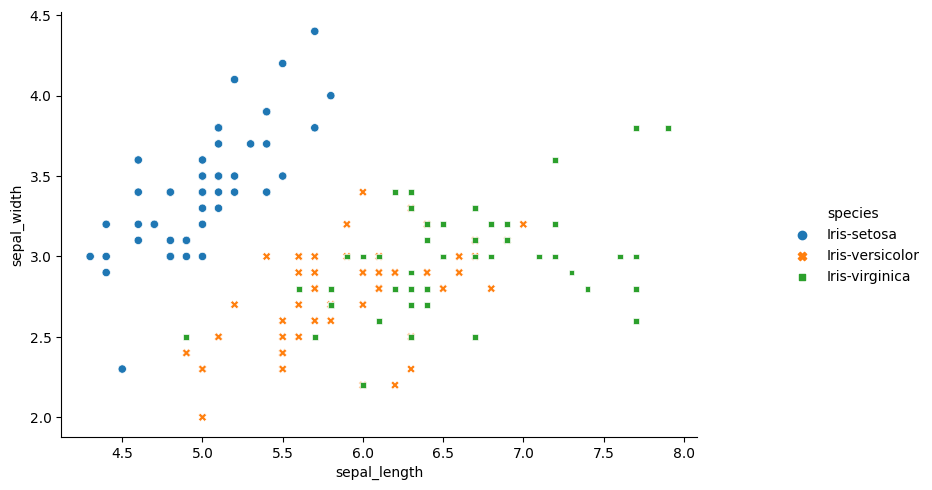

In [9]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=raw_data,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

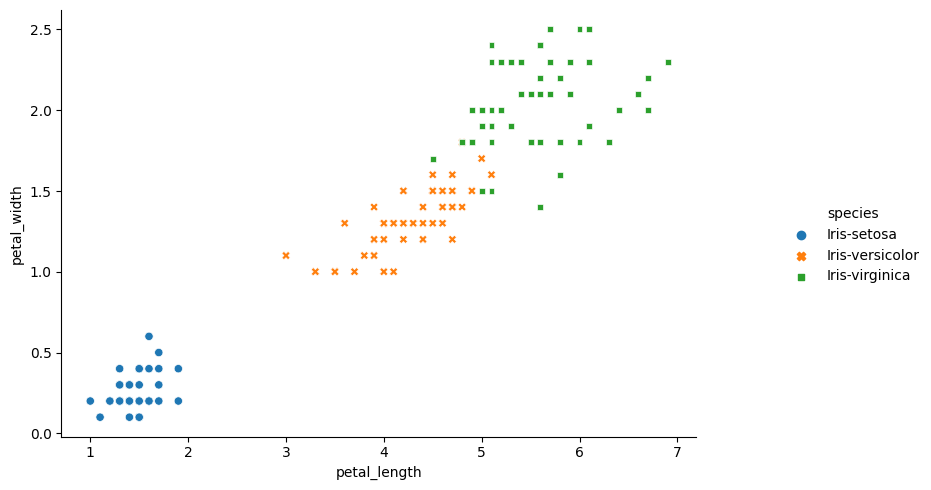

In [10]:
g=sns.relplot(x='petal_length',y='petal_width',data=raw_data,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

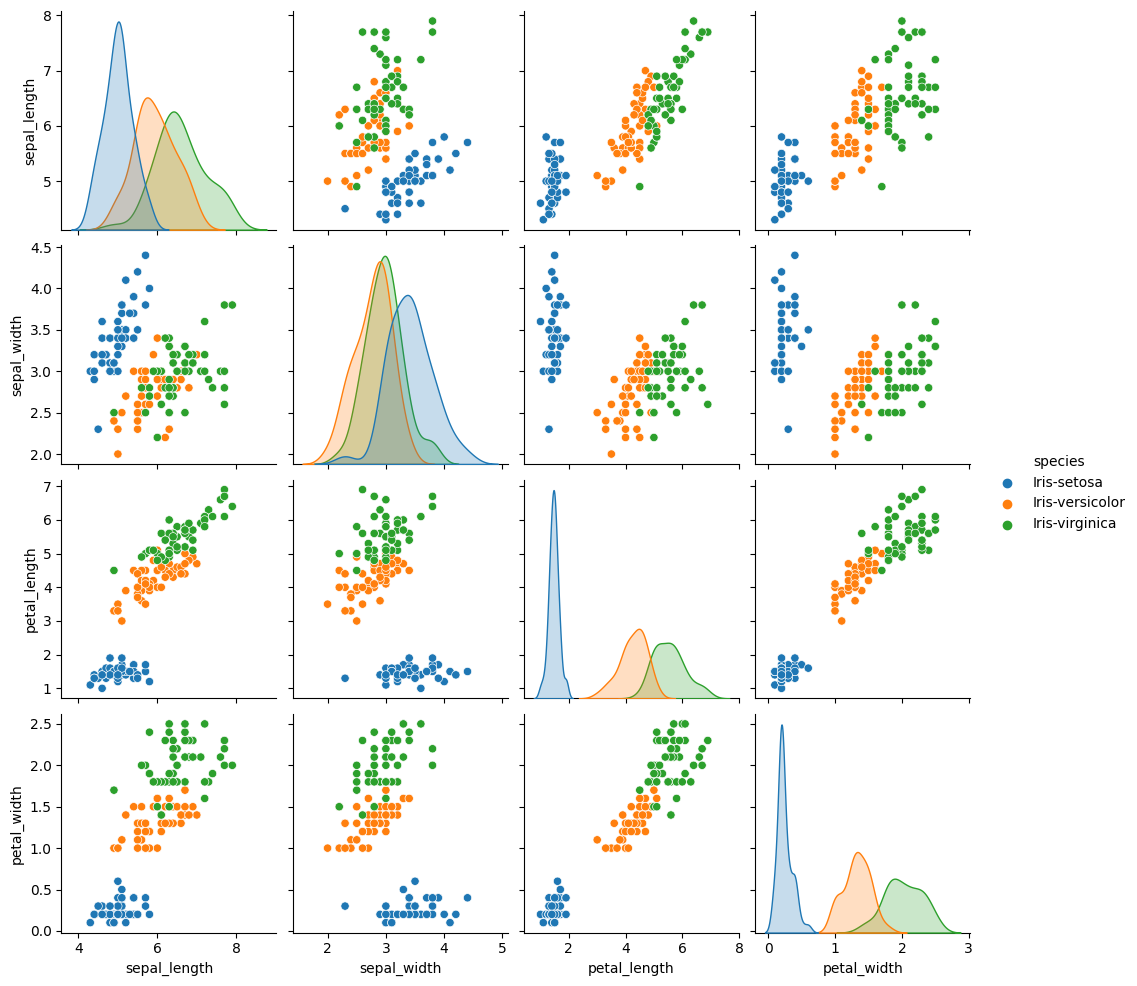

In [11]:
sns.pairplot(raw_data,hue='species')
plt.show()

In [12]:
data=raw_data.drop('species',axis=1)
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


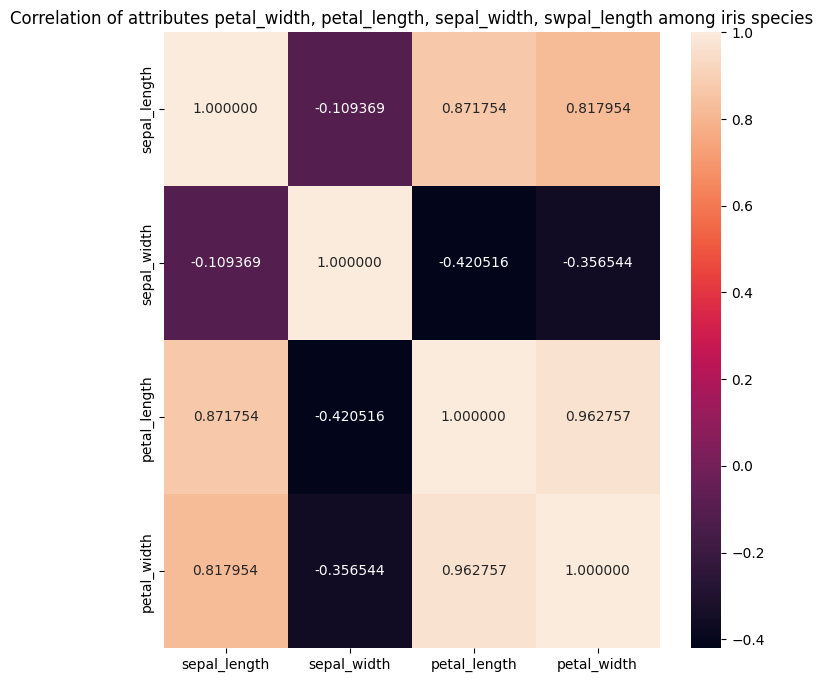

In [13]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,fmt='f').set_title("Correlation of attributes petal_width, petal_length, sepal_width, swpal_length among iris species")
plt.show()

In [14]:
def mapoutcomes(ot):
    if ot=="Iris-setosa":
        return float(0)
    elif ot=="Iris-versicolor":
        return float(1)
    else:
        return float(2)

In [15]:
raw_data['Species_map']=raw_data['species'].apply(mapoutcomes)

In [16]:
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_map
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [17]:
df=raw_data

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_map
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [19]:
df.drop('species',axis=1,inplace=True)

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species_map
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
df['Species_map'].unique()

array([0., 1., 2.])

In [24]:
X=df.copy()
y=X.pop('Species_map')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [27]:
print("Training data set shape of X{}. Training data set shape of y{}".format(X_train.shape,y_train.shape))
print("Testing data set shape of X{}. Testing data set shape of y{}".format(X_test.shape,y_test.shape))


Training data set shape of X(120, 4). Training data set shape of y(120,)
Testing data set shape of X(30, 4). Testing data set shape of y(30,)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [33]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Logistic Regression


In [35]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

Y_pred=logreg.predict(X_test)

accuracy_lr=round(accuracy_score(y_test,y_pred)*100,2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
accuracy_Logistic Regression : 0.967
precision_Logistic Regression : 0.967
recall_Logistic Regression: 0.967
f1-score_Logistic Regression : 0.967


## K Nearest Neighbor Classifier

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
accuracy_KNN : 1.000
precision_KNN : 1.000
recall_KNN: 1.000
f1-score_KNN : 1.000


## Gaussian Nearest Neighbor

In [37]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
accuracy_Naive Bayes: 0.933
precision_Naive Bayes: 0.933
recall_Naive Bayes: 0.933
f1-score_Naive Bayes : 0.933


## Linear Support Vector Classifier

In [38]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
accuracy_SVC: 0.900
precision_SVC: 0.900
recall_SVC: 0.900
f1-score_SVC : 0.900


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Decision Tree Classifier

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)


Confusion matrix for DecisionTree
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
accuracy_DecisionTree: 0.967
precision_DecisionTree: 0.967
recall_DecisionTree: 0.967
f1-score_DecisionTree : 0.967


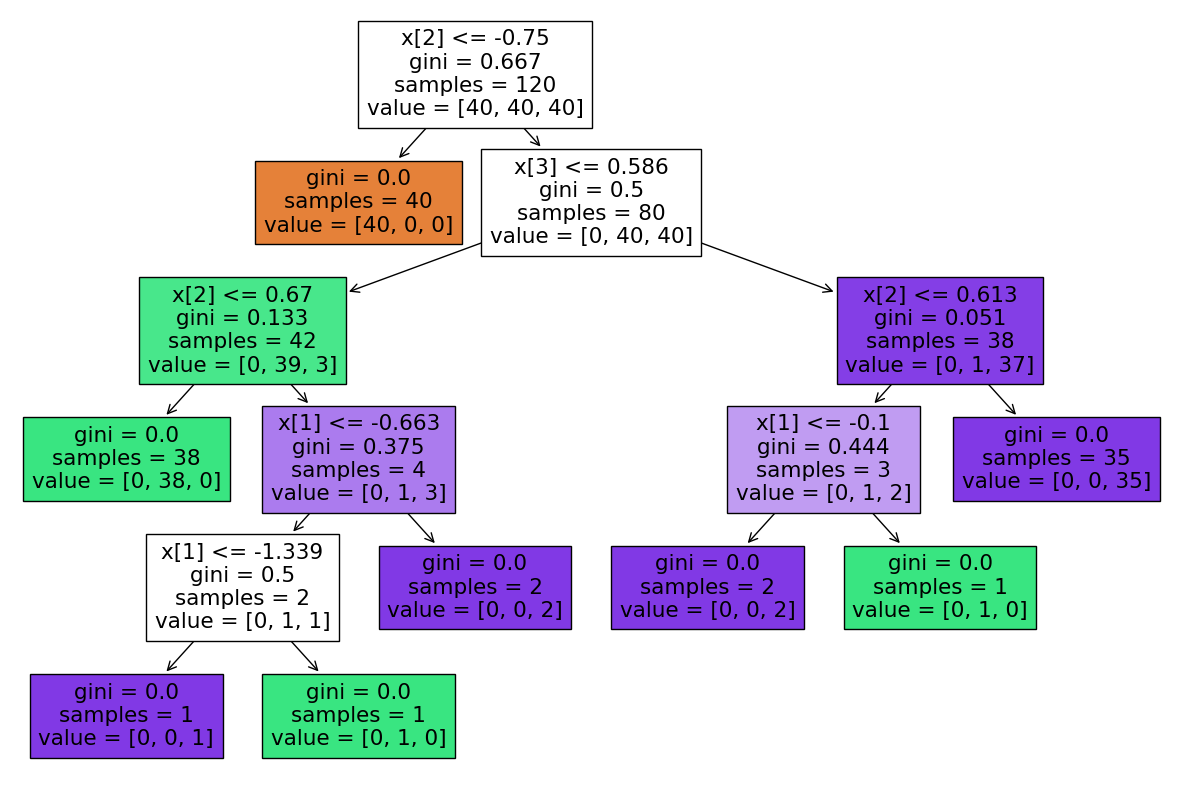

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

In [41]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Logistic Regression',
              'Naive Bayes',
              ' Support Vector Machine',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log,
              acc_gaussian,
              acc_linear_svc,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,KNN,97.50,100.00
1,Logistic Regression,95.83,96.67
2,Decision Tree,100.00,96.67
3,Naive Bayes,95.83,93.33
4,Support Vector Machine,95.83,90.00


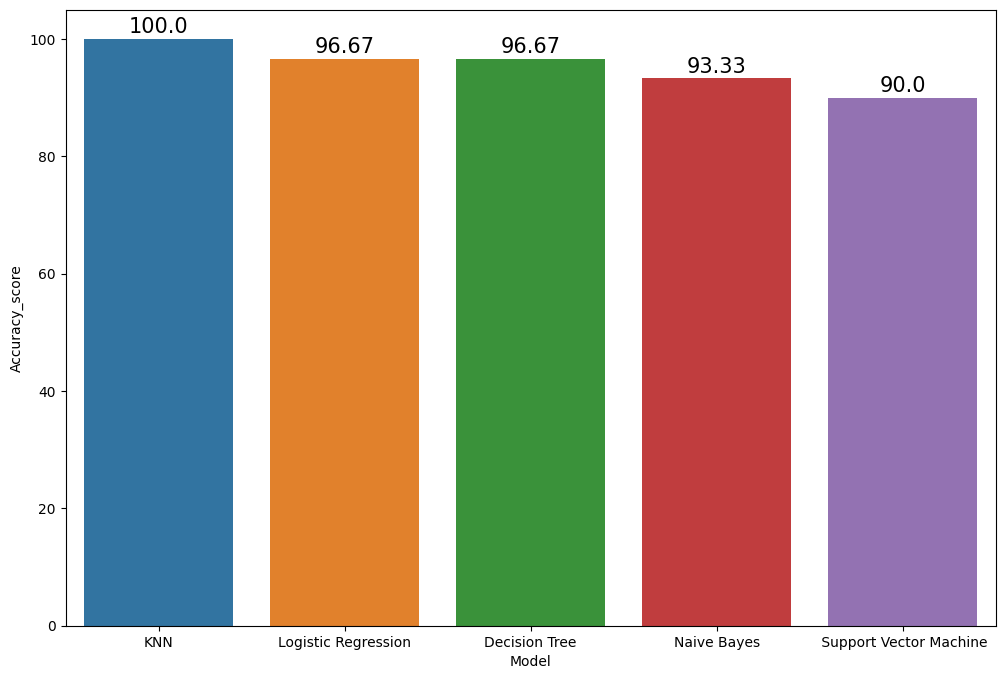

In [42]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')